### Bandpassed Hilbert transform and phase locking

We create three different signals here (signal1, signal2, signal3). They all are sine waves, but with a lot of jitter and an unstable phase progression. However, two of them are phaselocked! Find out which of the three signals by computing the phase locking values...

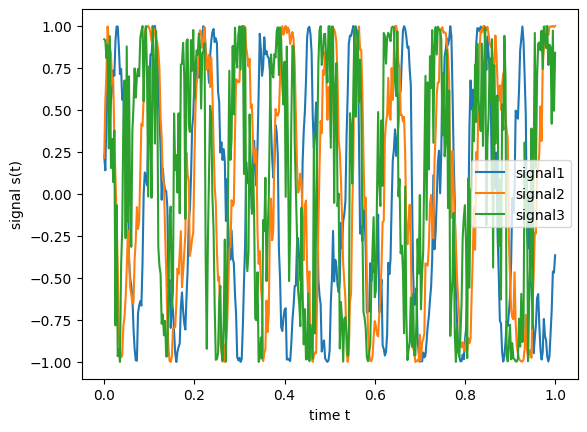

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# properties of time series: length, sampling rate...
t_max = 10.0
dt_bin = 0.0025
n_bins = int(np.ceil(t_max / dt_bin))
t = dt_bin * np.arange(n_bins)

# we generate three harmonics with frequency jitter
# two of the signals are phase-locked! ...find out which!

rng = np.random.default_rng(42)

# properties of signals
f0 = 10.0
df_jitter = 1.5
dphi0 = 0.5
phi_shift = np.pi / 4

# jittered phase advance
dphi1 = 2 * np.pi * f0 * (1 + df_jitter * rng.normal(size=(n_bins,))) * dt_bin
dphi2 = 2 * np.pi * f0 * (1 + df_jitter * rng.normal(size=(n_bins,))) * dt_bin

# compute phase phi(t)
phi1 = np.cumsum(dphi1)
phi2 = np.cumsum(dphi2)
phi3 = phi2 + dphi0 * rng.normal(size=(n_bins,)) + phi_shift

# generate signals from phase
signal1 = np.sin(phi1)
signal2 = np.sin(phi2)
signal3 = np.sin(phi3)

# plot samples
t_idx = np.where(t > 1.0)[0][0]
plt.plot(t[:t_idx], signal1[:t_idx])
plt.plot(t[:t_idx], signal2[:t_idx])
plt.plot(t[:t_idx], signal3[:t_idx])
plt.xlabel('time t')
plt.ylabel('signal s(t)')
plt.legend(('signal1', 'signal2', 'signal3'))
plt.savefig("exercise4_fig1.png", dpi=300)
plt.show()



# Tasks

For extracting the phases of the signals, we could use the wwavelet transform. Another possibility is to use the Hilbert transform, which we will do here:

1. First we neet to bandpass the signal for focusing on a frequency range of interest. For this purpose we recommend to implement a forward-backward filter since it is important to not introduce a phase shift when we're interested in phase relations.

2. Next we need to apply the Hilbert transform. Bandpass and Hilbert transform could be conveniently implemented in one function.

3. Using the phase of the analytic signals, compute the phase locking value between all pairs of the three signals and display it. Which of the two signals are phase-related to each other?

3. Compute the phase locking in dependence on observation time and plot the PLVs over time. How long have your 'trials' to extend in time for determining if there is really some substantial phase-locking? 


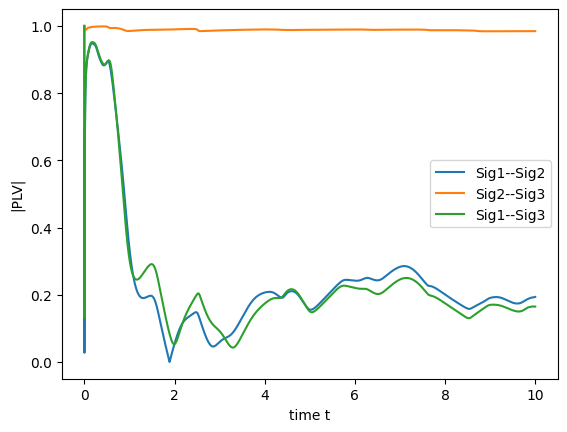

In [3]:
import spectral

a1, f1 = spectral.hilbert_bandpassed(signal1, f0, 0.1 * f0, dt_bin)
a2, f2 = spectral.hilbert_bandpassed(signal2, f0, 0.1 * f0, dt_bin)
a3, f3 = spectral.hilbert_bandpassed(signal3, f0, 0.1 * f0, dt_bin)

# plt.plot(np.angle(a1))
# plt.plot(np.angle(a2))
# plt.plot(np.angle(a3))
# plt.show()

aplv12 = np.zeros((n_bins,))
aplv23 = np.zeros((n_bins,))
aplv13 = np.zeros((n_bins,))
for i in range(n_bins):
    aplv12[i] = np.abs(spectral.phase_locking_value(a1[:i + 1], a2[:i + 1]))
    aplv23[i] = np.abs(spectral.phase_locking_value(a2[:i + 1], a3[:i + 1]))
    aplv13[i] = np.abs(spectral.phase_locking_value(a1[:i + 1], a3[:i + 1]))

plt.plot(t, aplv12)
plt.plot(t, aplv23)
plt.plot(t, aplv13)
plt.legend(('Sig1--Sig2', 'Sig2--Sig3', 'Sig1--Sig3'))
plt.xlabel('time t')
plt.ylabel('|PLV|')
plt.show()


